# Q* Learning with Gym FrozenLake-v0 "4x4"

### Import the dependencies

* Numpy - a library of linear algebra
* Gym - a library of environments
* Random - a library which helps us to generate random numbers
* Matplotlib - a plotting library

In [11]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt
%matplotlib inline

### Create the FrozenLake environment

In [12]:
env = gym.make('FrozenLake-v0', map_name="4x4", is_slippery=True) # We add some randomness to our algorithm

### Create Q-table and initialize it

In [13]:
action_size = env.action_space.n
state_size = env.observation_space.n

print("Action size is", action_size)
print("State size is", state_size)

Action size is 4
State size is 16


In [14]:
qtable = np.zeros((state_size, action_size))

### Create the hyperparameters

In [15]:
total_train_episodes = 25000 # Total episodes, which we will use to train our algorithm

learning_rate = 0.8
gamma = 0.9                # Discounting rate

# Exploration parameters
epsilon = 1.0                   # Exploration rate
max_epsilon = 1.0                 # Exploration probability at start 
min_epsilon = 0.01               # Minimum exploration probability
decay_rate = 0.003               # Exponential decay rate for exploration probability

### The Q learning algorithm

In [16]:
rewards = []
avg_rewards = []
best_avg_reward = 0

for episode in range(total_train_episodes):
    # Reset the environment
    state = env.reset()       # reset() returns an initial observation
    total_rewards = 0
    
    while True:
        # First we randomize a number
        tradeoff = random.uniform(0, 1) # The tradeoff between exploration and explotation
        
        # If this number is greater than epsilon, then we do exploitation (taking the biggest Q value for this state)
        if tradeoff > epsilon:
            action = np.argmax(qtable[state, :]) # numpy.argmax returns the indices of the maximum values along an axis
            
        # Else doing a random choice
        else:
            action = env.action_space.sample()
        
        # Take the action (a) and observe the outcome state(s') and a reward(r)
        new_state, reward, done, _ = env.step(action)
        
        # Update Q(s, a)
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma *
                                    np.max(qtable[new_state, :]) - qtable[state, action])
        
        # Our new state is state
        state = new_state
        
        # Calculate total rewards for an episode
        total_rewards += reward
        
        if done:
            break
    
    rewards.append(total_rewards)
        
    if episode >= 100:
        avg_reward = np.mean(rewards[episode-99:episode+1])
        avg_rewards.append(avg_reward)
        if avg_reward > best_avg_reward:
            best_avg_reward = avg_reward
    
    episode += 1
    
    # Reduce epsilon (because we need less and less exploration, and more and more exploatation)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * episode)
    
    
print("Best average reward is", best_avg_reward)
print(end='\n\n\n')
print("Our Q table after learning:", qtable, sep='\n')

Best average reward is 0.7



Our Q table after learning:
[[7.29447387e-03 5.64041379e-02 1.45264594e-02 8.95198218e-03]
 [3.61629662e-03 1.46701672e-02 1.09207834e-02 4.94482517e-02]
 [4.90654918e-02 6.16309457e-05 1.27593641e-02 1.14606157e-02]
 [1.04332625e-04 8.22983046e-06 1.81410060e-03 8.69066172e-03]
 [7.68207513e-02 5.50429893e-02 4.79425497e-04 2.20456701e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.34434246e-01 9.66163832e-07 4.28159553e-06 2.84165621e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16064373e-03 1.50045619e-02 1.41078666e-02 2.47143340e-01]
 [2.19855178e-02 2.11704471e-01 2.44913948e-02 7.09955570e-04]
 [6.96221376e-01 5.32922640e-04 1.35422836e-02 1.77486845e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [2.82531352e-03 7.29038528e-02 1.69899925e-01 7.58448038e-02]
 [2.54753366e-02 2.49962272e-01 8.06820648e-02 3.94844429e-0

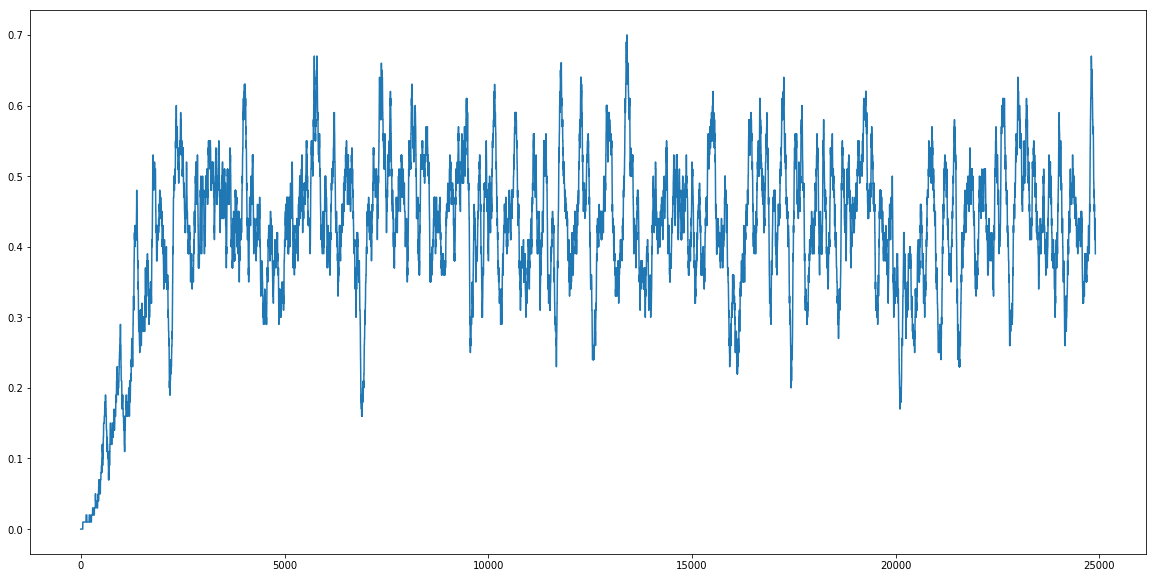

In [17]:
plt.figure(figsize=(20, 10))
plt.plot(avg_rewards)
plt.show()

# Use our Q-table to play FrozenLake

After 25000 episodes, our Q-table can be used as a "cheatsheet" to play FrozenLake

In [20]:
for episode in range(10):
    state = env.reset()
    print("Episode:", episode, end="\n\n")
    
    while True:
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(qtable[state, :])
        
        new_state, reward, done, _ = env.step(action)
        
        state = new_state
        
        if done:
            # Here, we decide to only print the last state (to see if our agent is on the goal or fall into an hole)
            env.render()
            break

env.close()

Episode: 0

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 1

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 2

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 3

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 4

  (Down)
SFFF
FHFH
FFFH
HFFG
Episode: 5

  (Left)
SFFF
FHFH
FFFH
HFFG
Episode: 6

  (Left)
SFFF
FHFH
FFFH
HFFG
Episode: 7

  (Left)
SFFF
FHFH
FFFH
HFFG
Episode: 8

  (Left)
SFFF
FHFH
FFFH
HFFG
Episode: 9

  (Down)
SFFF
FHFH
FFFH
HFFG
